# Introduction to NumPy

* Understanding Data Types in Python
* The Basics of NumPy Arrays
* Computation on NumPy Arrays: Universal Functions
* Aggregations: Min, Max, and Everything In Between
* Computation on Arrays: Broadcasting
* Comparisons, Masks, and Boolean Logic
* Fancy Indexing
* Sorting Arrays
* Structured Data: NumPy's Structured Arrays

## NumPy (short for Numnerical Python)

NumPy website: https://numpy.org/

Numpy provides an efficient interface to store and operate on dense data buffers. 

Despite the apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.
* Images - particularly digital images - can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area.
* Sound clips can be though of as one-dimensional arrays of intensity versus time.
* Text can be converted in various ways into numercial representations, perhaps binary digits representing the frequency of certain words or pairs of words.

In [1]:
import numpy
numpy.__version__

'1.18.1'

By convention, you'll find that most people in the SciPy/PyData world will import NumPy using np as an alias

In [2]:
import numpy as np

## Understanding Data Types in Python 

While a statically typed language like C or Java requires each variable to be explictly declared, a dynamically typed languages like Python skips this specification.

In [3]:
# Python code
result = 0 
for i in range(100):
    result += i 

The main difference: in C, the data type of each variable are explicitly declared, while in Python the types are dynamically inferred. 

In Python, we can assign any kind of data to any variable

In [4]:
x = 4
x = "four"

The same thing in C would lead (depending on compiler settings) to a compilation error or other unintended consequences.

This sort of flexibility is one piece that makes Python and other dynamically typed languages convenient and easy to use.

### A Python Integer is More Than Just an Integer 

The standard Python implementation is written in C. This means that every Python object is simply a cleverly disguised C structure, which contains not only its value, but other information as well.  

A single integer in Python 3.4 actually contains four pieces
* ob_refcnt, a reference count that helps Python silently handle memory allocation and deallocation
* ob_type, which encodes the type of the variable
* ob_size, which specifies the size of the following data members
* ob_digits, which contains the actual integer value that we expect the Python variable to represent. 

This means that there is some overhead in storing an integer in Python as compared to an integer in a compiled language like C

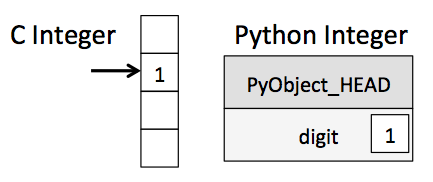

Note: PyObject_Head is the part of the structure containing the reference count, type code, and other pieces mentioned before. 

A C integer is essentially a label for a position in memory whose bytes encodes an integer value.

A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.

This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically. All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects. 

### A Python List is More Than Just a List 

The standard mutable multielement container in Python is the list

In [5]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
type(L[0])

int

In [7]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [8]:
type(L2[0])

str

In [9]:
L3 = [True, "2", 3.0, 4]

In [10]:
[type(item) for item in L3]

[bool, str, float, int]

But this flexibility comes at cost: to allow these flexiable types, each item in the list must contain its own type info, reference count, and other information -- that is, each item is a complete Python object

The advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type. 

Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data. 

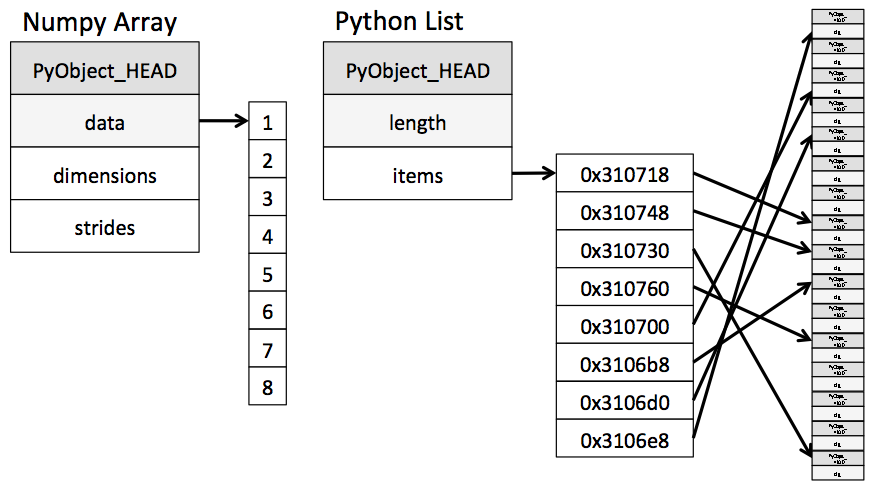

### Fixed-Type Arrays in Python 

Python offers several different options for storing data in efficient, fixed-type data buffers.

The built-in array module (avaiable since Python 3.3) can be used to create dense arrays of a uniform type

In [11]:
import array

In [12]:
L = list(range(10))
# 'i' is a type code indicating the contents are integers
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

While Python's array object provides efficient storage of array-based data, NumPy adds to this efficient operations on that data.

### Creating Arrays from Python Lists

We can use np.array to create arrays from Python lists

In [13]:
import numpy as np

In [14]:
# integer array
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, Numpy is constrained to arrays that all contain the same type. If types do not match, NumPy will upcast if possible 

In [15]:
# integers are upcast to floating point  
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the dtype keyword.

In [16]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Unlike Python lists, NumPy arrays can explicitly be multidimensional array

In [17]:
# nested lists result in multidimensional arrays
np.array([range(i, i+3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### Creating Arrays from Scratch

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into Numpy

In [18]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Create a 3x5 floating-point array filled with 1s
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [20]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [21]:
# Crate an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# This is similar ti the built-in range( ) function
np.arange(0, 20, 2) 

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [22]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [23]:
#Create a 3x3 array of uniformly distributed random values between 0 and 1
np.random.random((3, 3))

array([[0.16467321, 0.10753468, 0.82808809],
       [0.01802612, 0.24984364, 0.94279093],
       [0.71853612, 0.12380248, 0.74833991]])

In [24]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 0.7464417 ,  2.80225996, -0.0711731 ],
       [-1.20171227, -0.69085394,  0.45181229],
       [ 0.71297314, -1.04140764, -0.22469779]])

In [25]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[9, 1, 1],
       [6, 8, 3],
       [3, 1, 4]])

In [26]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exists at that memory locations
np.empty(3)

array([1., 1., 1.])

### NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations. 

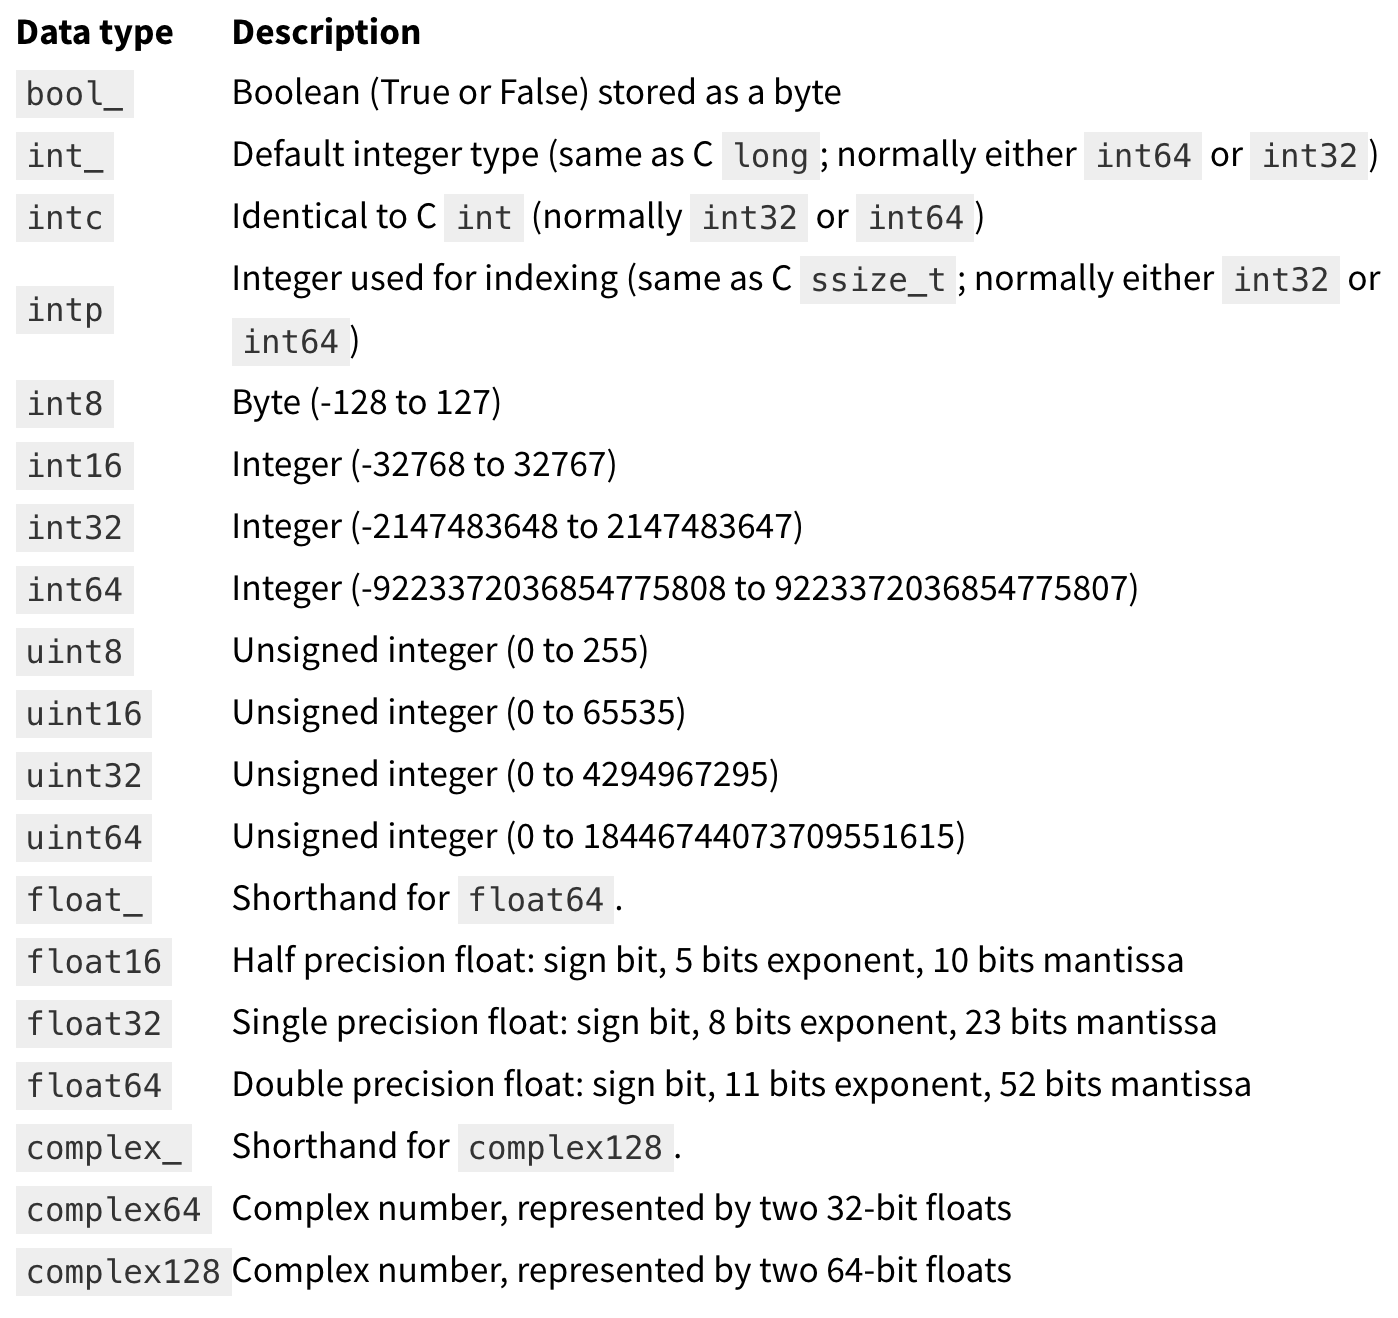

## The Basics of NumPy Arrays

We'll cover a few categories of basic array manipulations
* Attributes of arrays
* Indexing of arrays
* Slicing of arrays
* Reshaping of arrays
* Joining and splitting of arrays

### NumPy Array Attributes

We'll use NumPy's random number generator, which we will seed with a set value in order to ensure that the same random arrays are generated each time this code is run

In [28]:
import numpy as np
np.random.seed(0) # seed for reproducibility

In [29]:
x1 = np.random.randint(10, size=6) # one-dimensional array
x2 = np.random.randint(10, size=(3, 4)) # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5)) # Three-dimensional array

In [30]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

Each array has attributes ndim (the number of dimensions), shape (the size of each dimension), and size (the total size of the array)

In [31]:
print("x3 ndim: ", x3.ndim)
print("x3 shape: ", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape:  (3, 4, 5)
x3 size:  60


Another useful attribute is the dtype, the data type pf the array

In [32]:
print("dtype: ", x3.dtype)

dtype:  int64


Other attribute include itemsize, which lists the sizes (in bytes) of each array element, and nbytes, which lists the total size (in bytes) of the array.

In [33]:
print("itemsize: ", x3.itemsize, "bytes")

itemsize:  8 bytes


In [34]:
print("nbytes: ", x3.nbytes, "bytes")

nbytes:  480 bytes


### Array Indexing: Accessing Single Elements

In a one-dimensional array, you can access the ith value (counting from zero) by specifying the desired index in the square brackets

In [35]:
x1

array([5, 0, 3, 3, 7, 9])

In [36]:
x1[0]

5

In [37]:
x1[4]

7

To index from the end of the array, you can use negative indices

In [38]:
x1[-1]

9

In [39]:
x1[-2]

7

In a multidimensional array, you access items using a comma-separated tuple of indices.

In [40]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [41]:
x2[0, 0]

3

In [42]:
x2[2, 0]

1

In [43]:
x2[2, -1]

7

You can also modify values using any of the above index notation 

In [44]:
x2[0, 0] = 12

In [45]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

NumPy arrays have a fixed type. If you attempt to insert a floating-point value to an integer array, the value will be silently truncated. 

In [46]:
x1[0] = 3.14159  # this will be truncated!

In [47]:
x1

array([3, 0, 3, 3, 7, 9])

### Array Slicing: Accessing Subarrays

The NumPy slicing syntax follows that of the standard Python lists; to access a slice of an array x, use this: x[start: stop: step]. If any of these are unspecified, they default to the values start=0, stop=size of dimension, step=1.  

#### One-dimensional subarrays

In [48]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
x[:5] # first five elements

array([0, 1, 2, 3, 4])

In [50]:
x[5:] # elements after index 5

array([5, 6, 7, 8, 9])

In [51]:
x[4:7] # middle subarray

array([4, 5, 6])

In [52]:
x[::2] # every other element

array([0, 2, 4, 6, 8])

In [53]:
x[1::2] # every other elements, starting at index 1

array([1, 3, 5, 7, 9])

A potentially confusing case is when the step value is negative. In this case, the defaults for start and stop are swapped. This becomes a convenient way to reverse an arry. 

In [54]:
x[::-1] # all elements, reversed 

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [55]:
x[5::-2] # reversed every other from index 5

array([5, 3, 1])

#### Multidimensional subarrays

Multidimensional slices work in the same way, with multiple slices separated by commas

In [56]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [57]:
x2[:2, :3] # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [58]:
x2[:3, ::2] # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

Subarray dimensions can even be reversed together

In [59]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

#### Accessing array rows and columns

One commonly needed routine is accessing single rows or columns of an array. You can do this by combining indexing and slicing, using an empty slice marked by a single colon(:)

In [60]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [61]:
print(x2[:, 0]) # first column of x2

[12  7  1]


In [62]:
print(x2[0, :]) # first row of x2

[12  5  2  4]


In the case of row access, the empty slice can be omitted for a more compact syntax

In [63]:
print(x2[0])

[12  5  2  4]


#### Subarrays as no-copy views

One important and extremely useful thing to know about array slices is that they return views rather than copies of the array data. 

In [64]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [65]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


Now if we modify this subarray, we'll see that the original array is changed!

In [66]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [67]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


#### Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray.

In [68]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


In [69]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [70]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### Reshaping of Arrays

The most flexible way of doing this is with the reshape( ) method 

In [71]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array. Where possible, the reshape method will use a no-copy view of the initial array

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. You can do this with the reshape method, or more easily by making use of the newaxis keyword within a slice operation.

In [72]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [73]:
x.reshape((1, 3)) # row vector via reshape

array([[1, 2, 3]])

In [74]:
x[np.newaxis, :] # row vector via newaxis

array([[1, 2, 3]])

In [75]:
x.reshape((3, 1)) # column vector via reshape

array([[1],
       [2],
       [3]])

In [76]:
x[:, np.newaxis] # column vector via newaxis

array([[1],
       [2],
       [3]])

### Array Concatenation and Splitting

It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays.  

#### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished through the routines np.concatenate, np.vstack and np.hstack

np.concatenate takes a tuple or list or arrays as its first arguments

In [77]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

You can also concatenate more than two arrays at once

In [78]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


np.concatenate can also be used for two-dimensional arrays

In [79]:
grid = np.array([[1, 2, 3],
                 [3, 5, 6]])

In [80]:
np.concatenate([grid, grid]) # concatenate along the first axis

array([[1, 2, 3],
       [3, 5, 6],
       [1, 2, 3],
       [3, 5, 6]])

In [81]:
np.concatenate([grid, grid], axis=1) # concatenate along the second axis

array([[1, 2, 3, 1, 2, 3],
       [3, 5, 6, 3, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the np.vstack (vertical stack) and np.hstack (horizontal stack) functions

In [82]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

In [83]:
np.vstack([x, grid]) # vertically stack the arrays

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [84]:
y = np.array([[99],
              [99]])

In [85]:
np.hstack([grid, y]) # horizontally stack the arrays

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

#### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions np.split, np.hsplit, and np.vsplit. 

In [86]:
x = [1, 2, 3, 99, 99, 3, 2, 1]

In [87]:
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Notice that N split points lead to N+1 subarrays. The related functions np.hsplit and np.vsplit are similar

In [88]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [89]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [90]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## Computation on NumPy Arrays: Universal Functions

Computation on Numpy arrays can be very fast, or it can be very slow. The key to making it fast is use vectorized operations, generally implemented through NumPy's universial functions (ufuncs)  

### The Slownewss of Loops

In [91]:
import numpy as np
np.random.seed(0)

In [92]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

In [93]:
values = np.random.randint(1, 10 , size=5)
values

array([6, 1, 4, 4, 8])

In [94]:
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

This implementation probably feels fairly natural to someone from, say, a C or Java background. But if we measure the execution time of this code for a large input, we see that this operation is very slow. 

In [95]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

2 s ± 54.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a vectorized operation.

You can accomplish this by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

In [96]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


Looking at the execution time for our big array, we see that it completes orders of magnittude faster than the Python loop.

In [97]:
%timeit (1.0 / big_array)

1.75 ms ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.

In [98]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays - they can act on multidimensional arrays as well 

In [99]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented through Python loops, especially as the arrays grow in size. 

### Exploring NumPy's UFuncs

Ufuncs exist in two flavors:
* unary ufuncs, which operate on a single input
* binary ufuncs, which operate on two inputs

#### Array arithmetic

NumPy ufuncs feel very natural to use because they make use of Python's native arithmetic operators.

In [100]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, a ** operator for exponentiation, and a % operator for modulus.

In [101]:
print("-x     =", -x)
print("x ** 2 =", x ** 2)
print("x % 2  =", x % 2)

-x     = [ 0 -1 -2 -3]
x ** 2 = [0 1 4 9]
x % 2  = [0 1 0 1]


These can be strung together however you wish, and the standard order of the operations is respected. 

In [102]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

All of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy.

In [103]:
np.add(x, 2)

array([2, 3, 4, 5])

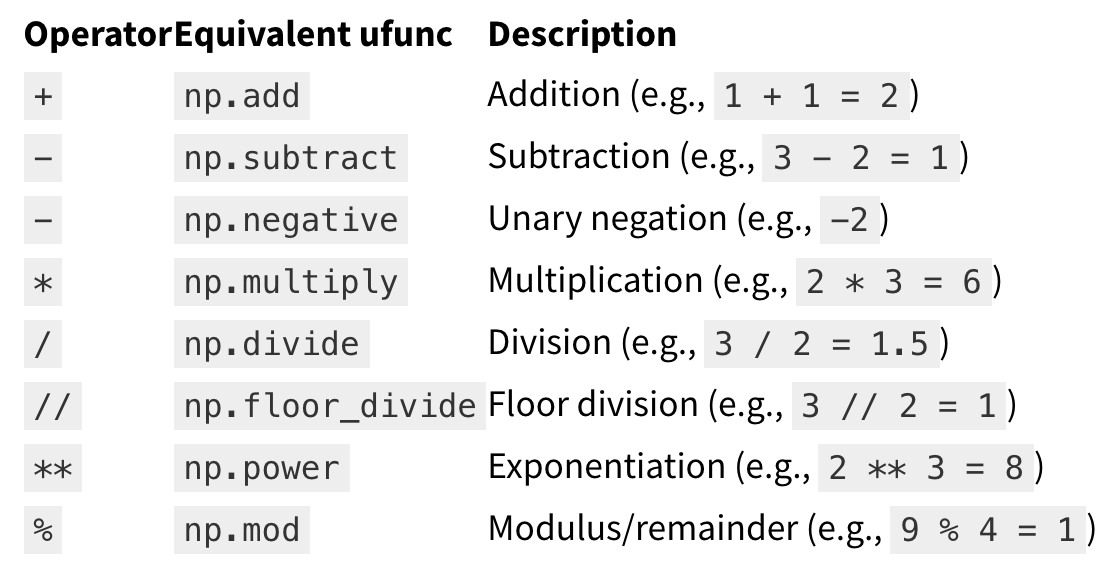

#### Absolute value

The corresponding NumPy ufunc is np.absolute, which is also available under the alias np.abs

In [104]:
x = np.array([-2, -1, 0, 1, 2])
x

array([-2, -1,  0,  1,  2])

In [105]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [106]:
np.abs(x)

array([2, 1, 0, 1, 2])

This ufunc can also handle complex data, in which the absolute value returns the magnitude.

In [107]:
x = np.array([3-4j, 4-3j, 2+0j, 0+1j])
np.abs(x)

array([5., 5., 2., 1.])

#### Trigonometric functions

In [108]:
theta = np.linspace(0, np.pi, 3)

In [109]:
print("theta      =", theta)
print("sin(theta) =", np.sin(theta))
print("cos(theta) =", np.cos(theta))
print("tan(theta) =", np.tan(theta))

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


Inverse trigonometric functions are also available

In [110]:
x = [-1, 0, 1]
print("x     =", x)
print("arcsin(theta) =", np.arcsin(x))
print("arccos(theta) =", np.arccos(x))
print("arctan(theta) =", np.arctan(x))

x     = [-1, 0, 1]
arcsin(theta) = [-1.57079633  0.          1.57079633]
arccos(theta) = [3.14159265 1.57079633 0.        ]
arctan(theta) = [-0.78539816  0.          0.78539816]


#### Exponents and logarithms

In [111]:
x = [1, 2, 3]
print("x    =", x)
print("e^x  =", np.exp(x))
print("2^x  =", np.exp2(x))
print("3^x  =", np.power(3, x))

x    = [1, 2, 3]
e^x  = [ 2.71828183  7.3890561  20.08553692]
2^x  = [2. 4. 8.]
3^x  = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available. The basic np.log gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well.

In [112]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


There are also some specialized versions that are useful for maintaining precision with very small input. When x is very small, these functions give more precise values than if the raw np.log or np.exp were used. 

In [113]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) -1  =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) -1  = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


#### Specialized ufuncs

NumPy has many more than ufuncs available. A look through NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule scipy.special

In [114]:
from scipy import special

In [115]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)  =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)  = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [116]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)    =", special.erf(x))
print("erfc(x)   =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)    = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)   = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


### Advanced Ufunc Features

#### Specifying output

Rather than creating a temporary array, you can use this to write computation results directly to the memory location where you'd like them to be. For all ufuncs, you can do this using the output argument of the function. 

In [117]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [118]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


#### Aggregates

If we'd like to reduce an array with a particular operation, we can use the reduce method of any ufunc. A reduce repeatedly applies a given operation to the elements of any array until only a single result remains. 

In [119]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [120]:
np.multiply.reduce(x)

120

If we'd like to store all the intermediate results of the computation, we can instead use accumulate. 

In [121]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [122]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

#### Outer products

Any ufunc can compute the output of all pairs of two different inputs using the outer method. This allows you, in one line, to do things like create a multiplication table. 

In [123]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## Aggregations: Mix, Max, and Everything in Between 

Often when you are faced with a large amount of data, a first step is to compute summary statistics for the data in question

### Summing the Values in an Array

Python itself can do this using the built-in sum function

In [124]:
import numpy as np
L = np.random.random(100)

In [125]:
sum(L)

50.461758453195614

The syntax is quite similar to that of NumPy's sum function, and the result is the same in the simplest case

In [126]:
np.sum(L)

50.46175845319564

However, because it executes the operation in compiled code, NumPy's version is computed much more quickly

In [127]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

155 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
408 µs ± 67.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Minimun and Maximum 

Python has built-in min and max functions

In [128]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

NumPy's corresponding functions have similar syntax, and again operate much more quickly.

In [129]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [130]:
%timeit min(big_array)
%timeit np.min(big_array)

85.5 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
382 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For min, max, sum and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself.  

In [131]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500216.8034810001


#### Multidimensional aggregates

In [132]:
M = np.random.random((3, 4))
print(M)

[[0.79832448 0.44923861 0.95274259 0.03193135]
 [0.18441813 0.71417358 0.76371195 0.11957117]
 [0.37578601 0.11936151 0.37497044 0.22944653]]


By default, each NumPy aggregation function will return the aggregate over the entire array

In [133]:
M.sum()

5.1136763453287335

One common type of aggregation operation is an aggregate along with a row or column.

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed.

We can find the minimum value within each column by specifying axis=0

In [134]:
M.min(axis=0)

array([0.18441813, 0.11936151, 0.37497044, 0.03193135])

Similarly, we can find the maximum value with each row

In [135]:
M.max(axis=1)

array([0.95274259, 0.76371195, 0.37578601])

The axis keyword specifies the dimension of the array that will be collapsed, rather than the dimension that will be returned. So specifying axis=0 means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated. 

#### Other aggregation functions

Most aggregates have a NaN-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point NaN value.

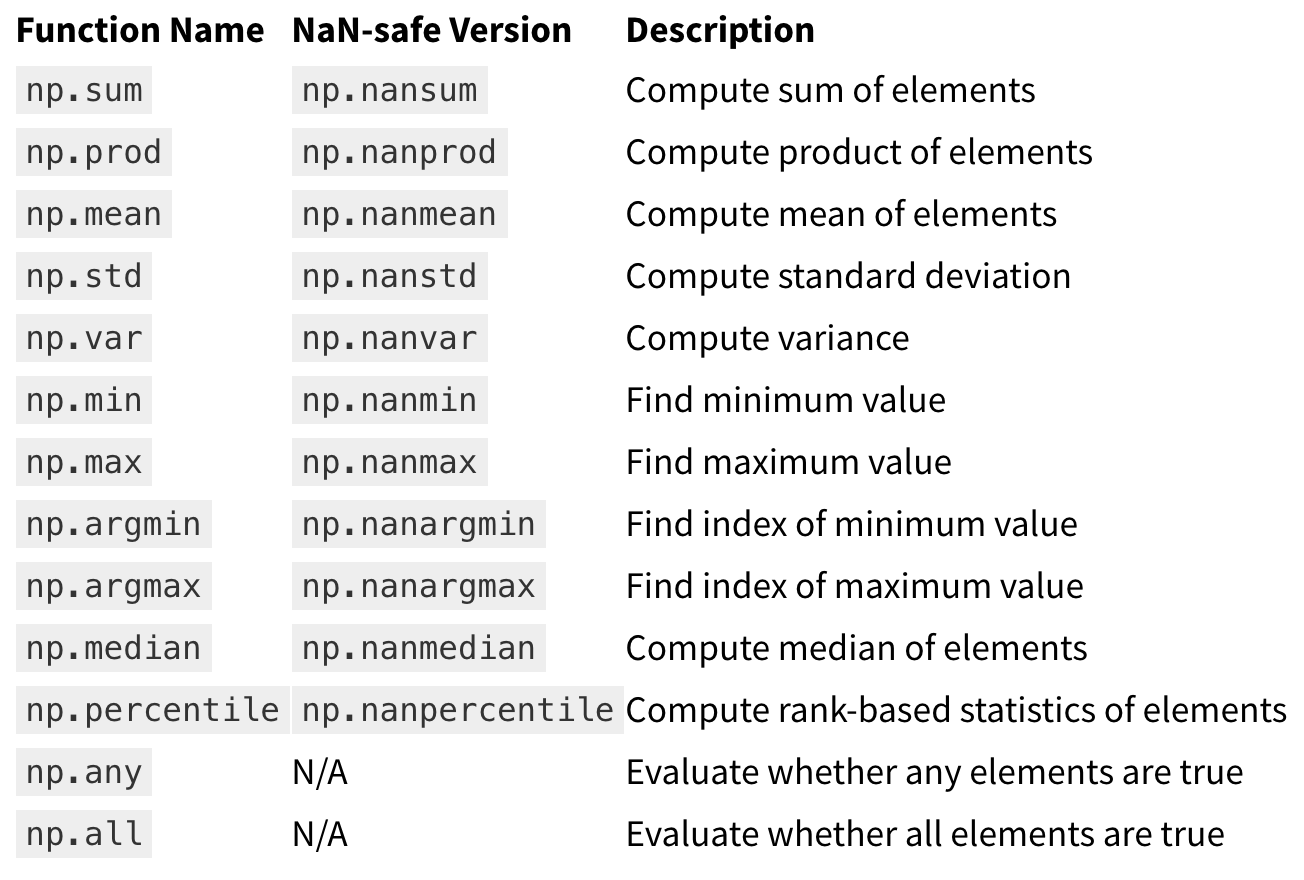

### Example: What is the Average Height of US Presidents?

As a simple example, let's consider the heights pf all US presidents. This data is available in the file president_heights.csv, which is a simple comma-separated list of labels and values.

In [136]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


We use the Pandas package to read the file and extract this information

In [137]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics

In [138]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values 

In [139]:
print("25th percentage:  ", np.percentile(heights, 25))
print("Median:           ", np.median(heights))
print("75th percentage:  ", np.percentile(heights, 75))

25th percentage:   174.25
Median:            182.0
75th percentage:   183.0


It's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set() # set plot style

Text(0, 0.5, 'number')

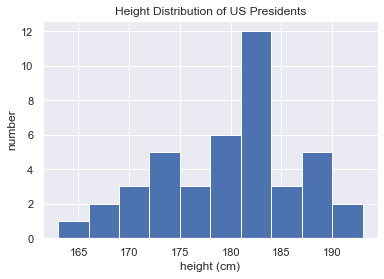

In [141]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

## Computation on Arrays: Broadcasting

Another means of vectorizing operations is to use NumPy's boradcasting functionality.

Broadcasting is simply a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes 

### Introducing Broadcasting

In [142]:
import numpy as np

In [143]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes

In [144]:
a + 5

array([5, 6, 7])

Observe the result when we add a one-dimensional array to a two-dimensional array

In [145]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [146]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

More complicated cases can involve broadcasting of both arrays.

In [147]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [148]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched both a and b to match a common shape, and the result is a two-dimensional array!

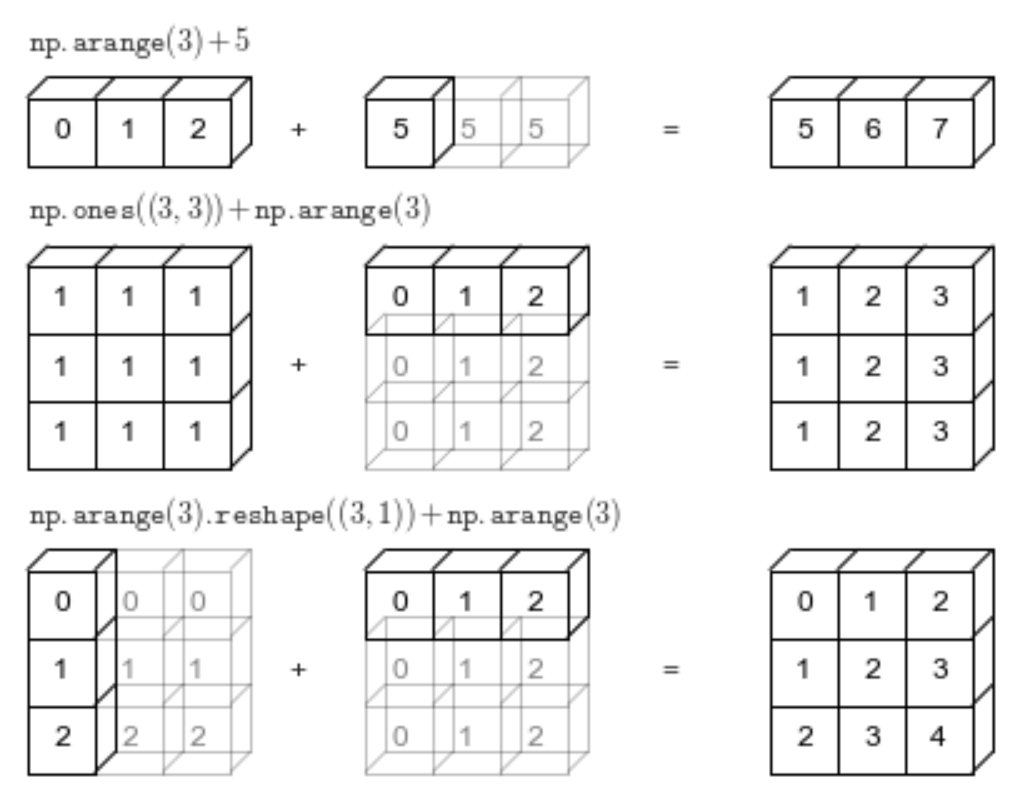

### Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays
* Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
* Rule 2: If the shape of the two arrays does not match in any dimensions, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

#### Broadcasting example 1

In [149]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are: 
* M.shape = (2, 3)
* a.shape = (3,)

We see by rule 1 that array a has fewer dimensions, so we pad it on the left with one:
* M.shape --> (2, 3)
* a.shape --> (1, 3)

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:
* M.shape --> (2, 3)
* a.shape --> (2, 3)

The shapes match, and we see that the final shape will be (2, 3)

In [150]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### Broadcasting example 2

In [151]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by writing out the shape of the arrays.
* a.shape = (3, 1)
* b.shape = (3,)

Rule 1 says we must pad the shape of b with ones:
* a.shape --> (3, 1)
* b.shape --> (1, 3)

And rule 2 tells us that we upgrade each of those ones to match the corresponding size of the other array:
* a.shape --> (3, 3)
* b.shape --> (3, 3)

Because the result matches, these shapes are compatible. 

In [152]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Broadcasting example 3

Let's take a look at an example in which the two arrays are not compatible:

In [153]:
M = np.ones((3, 2))
a = np.arange(3)

The shapes of the arrays are:
* M.shape = (3, 2)
* a.shape = (3, )

Again, rule 1 tells us that we must pad the shape of a with ones:
* M.shape --> (3, 2)
* a.shape --> (1, 3)

By rule 2, the first dimension of a is stretched to match that of M:
* M.shape --> (3, 2)
* a.shape --> (3, 3)

Now we hit rule 3 - the final shapes do not match, so these two arrays are incompatible, as we observe by attempting this operation:

In [154]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

If right-side padding is what you'd like, you can do this explicitly by reshaping the array

In [155]:
a[:, np.newaxis].shape

(3, 1)

In [156]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

Also note that while we've been focusing on the + operator here, these broadcasting rules apply to any binary ufunc.

In [157]:
# logaddexp(a, b) function computes log(exp(a) + exp(b))
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

### Broadcasting in Practice

#### Centering an array 

In [158]:
X = np.random.random((10, 3))

We can compute the mean of each feature using the mean aggregate across the first dimension

In [159]:
Xmean = X.mean(0) 
Xmean

array([0.49831076, 0.50193438, 0.46752888])

And now we can center the X array by subtracting the mean (this is a boradcasting operation) 

In [160]:
X_centered = X - Xmean

In [161]:
X_centered.mean(0)

array([-4.44089210e-17,  3.33066907e-17, -9.43689571e-17])

#### Plotting a two-dimensional function

One place that boradcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function z=f(x, y), broadcasting can be used to compute the function across the grid:

In [162]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x ) * np.cos(x)

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt

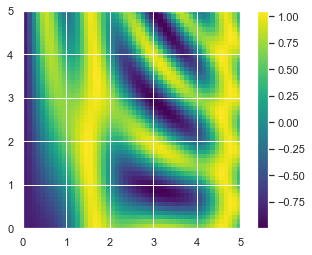

In [164]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## Comparisons, Masks, and Boolean Logic

Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion.

### Example: Counting Rainy Days

Imagine you have a series of data that represents the amount of precipitation each day for a year in a given city.

Here we'll load the daily rainfall statistics for the city of Seattle in 2014

In [165]:
import numpy as np
import pandas as pd

# Use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10 mm --> inches
inches.shape

(365,)

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set( ) # see plot styles

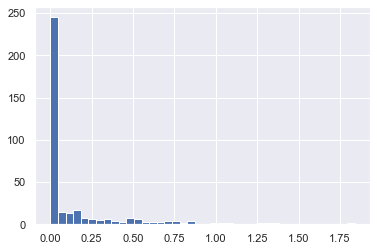

In [167]:
plt.hist(inches, 40);

But this doesn't do a good job of conveying some information we'd like to see: for example,
* How many rainy days were there in the year?
* What is the averge precipitation on those rainy days?
* How many days were there with more than half an inch of rain?

### Comparison Operators as ufuncs

NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. The result of these comparison operators is always with a Boolean data type

In [168]:
x = np.array([1, 2, 3, 4, 5])

In [169]:
x < 3 # less than

array([ True,  True, False, False, False])

In [170]:
x > 3 # greater than

array([False, False, False,  True,  True])

In [171]:
x <= 3 # less than or equal

array([ True,  True,  True, False, False])

In [172]:
x >= 3 # greater than or equal

array([False, False,  True,  True,  True])

In [173]:
x != 3 # not equal

array([ True,  True, False,  True,  True])

In [174]:
x == 3 # equal

array([False, False,  True, False, False])

It's also possible to do an element-by-element comparison of two arrays, and to include compound expressions:

In [175]:
(2 * x) == (x * 2)

array([ True,  True,  True,  True,  True])

A summary of the comparison operators and their equivalent ufunc is shown here

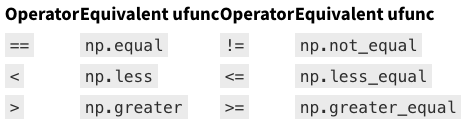

Just as in the case of arithmetic ufuncs, these will work on arrays of any size amd shape 

In [176]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [177]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### Working with Boolean Arrays

In [178]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


#### Counting entries

To count the number of True entries in a Boolean array, np.count_nonzero is useful 

In [179]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

Another way to get at this information is to use np.sum; in this case, False is interpreted as 0, and True is interpreted as 1.

In [180]:
np.sum(x < 6)

8

The benefit of sum( ) is that like with other NumPy aggregation functions, this summation can be done along with rows or columns as well 

In [181]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1) 
# this counts the number of values less than 6 in each row of the matrix 

array([4, 2, 2])

If we're interested in quickly checking whether any or all the values are true, we can use np.any( ) or np.all( ). 

In [182]:
# are there any values greater than 8?
np.any(x > 8)

True

In [183]:
# are there any values less than zero?
np.any(x < 0)

False

In [184]:
# are all values less than 10?
np.all(x < 10)

True

In [185]:
# are all values equal to 6?
np.all(x == 6)

False

np.all( ) and np.any( ) can be used along particular axes as well

In [186]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

Python has built-in sum( ), any( ), and all( ) functions. These have a different syntax than the NumPy versions, and in particular will fail or produced unintended results when used on multidimensional arrays.

#### Boolean operators

This is accomplished through Python's bitwise logic operators, &, |, ^, and ~. Like with the standard arithmetic operators, NumPy overloads these as ufuncs that work element-wise on (usualy Boolean) arrays.

In [187]:
np.sum((inches > 0.5) & (inches < 1))
# there are 29 days with rainfall between 0.5 and 1.0 inches

29

Using the equivalence of A AND B and NOT (A OR B), we can compute the same result in a different manner 

In [188]:
np.sum(~( (inches <= 0.5) | (inches >= 1)))

29

Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations

The following table summarizes bitwise Boolean operators and their equivalent ufuncs

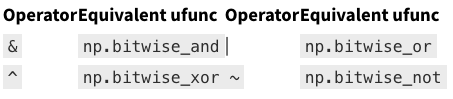

In [189]:
print("Number days without rain:       ", np.sum(inches == 0))
print("Number days with rain:          ", np.sum(inches != 0 ))
print("Days with more than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches:   ", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:        215
Number days with rain:           150
Days with more than 0.5 inches:  37
Rainy days with < 0.1 inches:    75


### Boolean Arrays as Masks

A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. 

In [190]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [191]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to select these values from the array, we can simply index on this Boolean array; this is known as a masking operation

In [192]:
x [x< 5]

array([0, 3, 3, 3, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet the condition; in other words, all the values in positions at which the mask array is True.

We are then free to operate on these values as we wish

In [193]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median percip on rainy days in 2014 (inches):    ",
        np.median(inches[rainy]))
print("Median percip on summer days in 2014 (inches):   ",
        np.median(inches[summer]))
print("Maximum percip on summer days in 2014 (inches):  ",
        np.max(inches[summer]))
print("Median percip on non-summer rainy days (inches): ",
        np.median(inches[rainy & ~summer]))



Median percip on rainy days in 2014 (inches):     0.19488188976377951
Median percip on summer days in 2014 (inches):    0.0
Maximum percip on summer days in 2014 (inches):   0.8503937007874016
Median percip on non-summer rainy days (inches):  0.20078740157480315


#### Using the Keywords and/or Versus the Operators & / |

The difference is: and and or gauge the truth or falsehood of entire object, while & and | refer to bits within each object

When you use and or or, it's equivalent to asking Python to threat the object as a single Boolean entry. 

In [194]:
bool(42), bool(0)

(True, False)

In [195]:
bool(42 and 0)

False

In [196]:
bool(42 or 0)

True

When you use & and | on integers, the expression operates on the bits of the element, applying the and or to the individual bits making up the number 

In [197]:
bin(42)

'0b101010'

In [198]:
bin(59)

'0b111011'

In [199]:
bin(42 & 59)

'0b101010'

In [200]:
bin(42 | 59)

'0b111011'

When you have an array of Boolean values in NumPy, this can be though of as a string of bits where 1 = True and 0 = False, and the result of & and | operates in a similar manner as before

In [201]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)

In [202]:
A | B

array([ True,  True,  True, False,  True,  True])

Using or on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value

In [203]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a Boolean expression on a given array, you should use | or & rather than or and and

In [204]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [205]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Fancy Indexing

Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values

### Exploring Fancy Indexing

Fancy indexing is conceptually simple: it means passing an array of indeices to access multiple array elements at once.

In [206]:
import numpy as np

rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [207]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatively, we can pass a single list of array of indices to obtain the same result

In [208]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

With fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed.  

In [209]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions. Like with standard indexing, the first index refers to the row, and the second to the column

In [210]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [211]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
# Notice that the 1st is x[0, 2], the 2nd is x[1, 1], and the 3rd is x[2, 3]
X[row, col]

array([ 2,  5, 11])

If we combine a column vector and a row vector within the indices, we get a two-dimensional result.

In [212]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

### Combined Indexing

In [213]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can combine fancy and simple indices

In [214]:
X[2, [2, 0, 1]]

array([10,  8,  9])

We can combine fancy indexing with slicing

In [215]:
X[1: , [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

And we can combine fancy indexing with masking

In [216]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values

### Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix

In [217]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

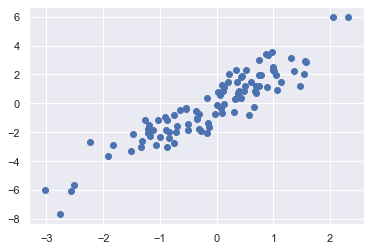

In [218]:
%matplotlib inline
import seaborn; seaborn.set( ) # for plot styling

plt.scatter(X[:, 0], X[:, 1])

In [219]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([22, 34, 30, 40, 27, 12, 65,  5, 54, 74, 78, 96, 70, 18, 72, 89, 29,
       45, 36, 88])

In [220]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

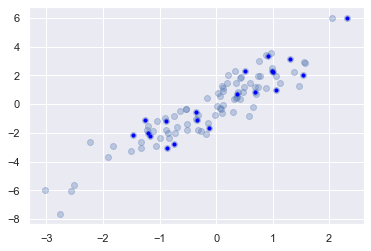

In [221]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='blue', s=10);

### Modifying Values with Fancy Indexing

Imagine we have an array of indices and we'd like to set the corresponding items in an array to some values

In [222]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any assignment-type operator for this

In [223]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Repeated indices with these operations can cause some potentially unexpected results

Where did the 4 go? The result of this operation is to the first assign x[0] = 4, followed by x[0] = 6. The result is that x[0] contains the 6.

In [224]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


You might expect that x[3] would contain the value 2, and x[4] would contain the value 3, as this is how many times each index is repeated. Why is this not the case?

In [225]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

This is because x[ i ] += 1 is meant as a shorthand of x[ i ] = x[ i ] + 1. x[ i ] + 1 is evaluated, and then the result is assigned to the indices in x

So what if you want to the other behavior where the operation is repeated? For this, you can use the at( ) method of ufuncs (available since NumPy 1.8)

In [226]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


### Example: Binning Data

Imagine we have 1,000 values and would like to quickly find where they fall within an array of bins

In [227]:
np.random.seed(42)
x = np.random.randn(1000)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i , 1)

/Users/lunghaolee/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


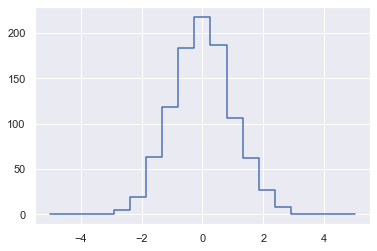

In [228]:
# The counts now reflect the number of points within each bin
plt.plot(bins, counts, linestyle='steps');

This is why Matplotlib provides the plt.hist( ) routine, which does the same in a single line

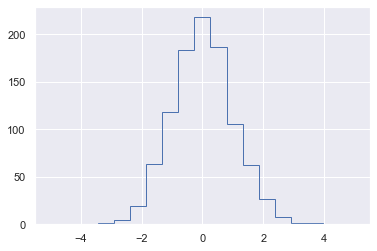

In [229]:
plt.hist(x, bins, histtype='step');

##### np.histogram

In [230]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
54.6 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
117 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [231]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
69.5 ms ± 757 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
117 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Sorting Arrays

All (e.g. insertion sort, selection sort, merge sort, quick sort, bubbule sort etc.) are means of accomplishing a similar task: sorting the values on a list or array

A simple selection sort repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. 

In [232]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [233]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In terms of the "big-O" notation often used to characterize these algorithms (see Big-O Notation), selection sort averages $\mathcal{O}[N^2]$

Even selection sort, though, is much better than a sorting algorithm, the bogosort

This silly sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted. With an average scaling of $\mathcal{O}[N \times N!]$, (that's N times N factorial) this should–quite obviously–never be used for any real computation.

In [234]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [235]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Fortunately, Python contains built-in sorting algorithms (eg. sort and sorted functions to work with lists) that are much more efficient than either of the simplistic algorithms just shown. 

### Fast Sorting in NumPy: np.sort and np.argsort

 NumPy's np.sort function turns out to be much more efficient and useful for our purposes

By default np.sort uses an $\mathcal{O}[N\log N]$, quicksort algorithm, though mergesort and heapsort are also available.

To return a sorted version of the array without modifying the input, you can use np.sort

In [236]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

If you prefer to sort the array in-place, you can instead use the sort method of arrays

In [237]:
x.sort()
print(x)

[1 2 3 4 5]


A related function is argsort, which instead returns the indices of the sorted elements:

In [238]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


These indices can then be used (via fancy indexing) to construct the sorted array if desired

In [239]:
x[i]

array([1, 2, 3, 4, 5])

#### Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the axis argument.

In [240]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [241]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [242]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

### Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array.

np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order

In [243]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

In [244]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

Finally, just as there is a np.argsort that computes indices of the sort, there is a np.argpartition that computes indices of the partition.

### Example: k-Nearest Neighbors

We'll start by creating a random set of 10 points on a two-dimensional plane. Using the standard convention, we'll arrange these in a $10\times 2$ array

In [245]:
X = rand.rand(10, 2)
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

To get an idea of how these points look, let's quickly scatter plot them

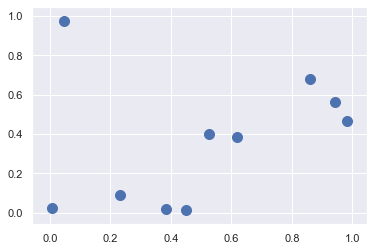

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

Now we'll compute the distance between each pair of points. Recall that the squared-distance between two points is the sum of the squared differences in each dimension

In [247]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps

In [248]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [249]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [250]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero

In [251]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out! With the pairwise square-distances converted, we can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors

In [252]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect

If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. 

 We can do this with the np.argpartition function

In [253]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors

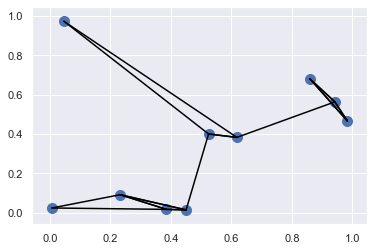

In [254]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

## Structured Data: NumPy's Structured Arrays

NumPy's structured arrays and record arrays, which provide efficient storage for compound, heterogeneous data.

In [255]:
import numpy as np

Imagine that we have several categories of data on a number of people (say, name, age, and weight), and we'd like to store these values for use in a Python program.

In [256]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [257]:
x = np.zeros(4, dtype=int)

We can similarly create a structured array using a compound data type specification

In [258]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


Here 'U10' translates to "Unicode string of maximum length 10," 'i4' translates to "4-byte (i.e., 32 bit) integer," and 'f8' translates to "8-byte (i.e., 64 bit) float."

Now that we've created an empty container array, we can fill the array with our lists of values

In [259]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [260]:
# Get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [261]:
# Get first row of data
data[0]

('Alice', 25, 55.)

In [262]:
# Get the name from the last row
data[-1]['name']

'Doug'

In [263]:
# Get names where age is under 30
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

### Creating Structured Arrays

Structured array data types can be specified in a number of ways. 

Earlier, we saw the dictionary method

In [264]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

For clarity, numerical types can be specified using Python types or NumPy dtypes instead

In [265]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

A compound type can also be specified as a list of tuples

In [266]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

If the names of the types do not matter to you, you can specify the types alone in a comma-separated string

In [267]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

 The first (optional) character is < or >, which means "little endian" or "big endian," respectively, and specifies the ordering convention for significant bits.

The next character specifies the type of data: characters, bytes, ints, floating points, and so on

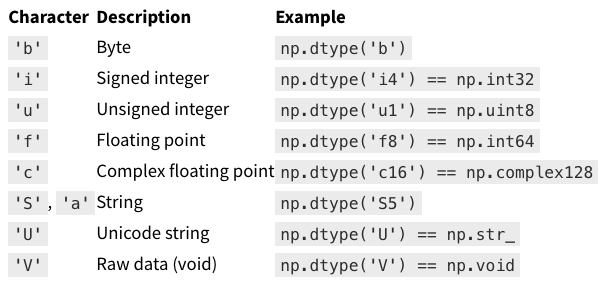

The last character or characters represents the size of the object in bytes

### More Advanced Compound Types

It is possible to define even more advanced compound types. Here, we'll create a data type with a mat component consisting of a 3×3 floating-point matrix

In [268]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Now each element in the X array consists of an id and a 3×3 matrix.

### RecordArrays: Structured Arrays with a Twist

NumPy also provides the np.recarray class, which is almost identical to the structured arrays just described, but with one additional feature: fields can be accessed as attributes rather than as dictionary keys. 

In [269]:
data['age']

array([25, 45, 37, 19], dtype=int32)

If we view our data as a record array instead, we can access this with slightly fewer keystrokes

In [270]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

The downside is that for record arrays, there is some extra overhead involved in accessing the fields, even when using the same syntax.

In [271]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

179 ns ± 26.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.34 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.97 µs ± 37.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Whether the more convenient notation is worth the additional overhead will depend on your own application